In [1]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

## Downloading the dataset
import datasets
from datasets import load_dataset

import evaluate
import torch.nn.functional as F

## pytorch lightning
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import WandbLogger

from torch.optim import AdamW
from torch.utils.data import DataLoader

In [22]:
dataset = load_dataset("nielsr/funsd-layoutlmv3")
#dataset = "C:/Users/pawvaibh/Downloads/Tobacco/Email"

In [2]:

from datasets import load_dataset 

dataset1 = load_dataset("Theivaprakasham/wildreceipt")

In [25]:
labels = dataset["train"].features["ner_tags"].feature.names
num_labels = len(labels)
id2label = {v: k for v, k in enumerate(labels)}
label2id = {k: v for v, k in enumerate(labels)}
print(label2id)

{'O': 0, 'B-HEADER': 1, 'I-HEADER': 2, 'B-QUESTION': 3, 'I-QUESTION': 4, 'B-ANSWER': 5, 'I-ANSWER': 6}


In [29]:
def plot_visualization(sample : dict):

    from PIL import ImageDraw, ImageFont, Image

    img = sample["image"]
    #img = Image.open(img_path)
    draw = ImageDraw.Draw(img)
    font = ImageFont.load_default()

    bbox = sample["bboxes"]
    ner_tags = sample["ner_tags"]
    
    for box, predicted_label in zip(bbox, ner_tags):

        ## The bounding box has been rescaled to the range of [0, 1000] considering an image is [1000, 1000]
        box[0] = int(img.size[0] * box[0] / 1000)
        box[1] = int(img.size[1] * box[1] / 1000)
        box[2] = int(img.size[0] * box[2] / 1000)
        box[3] = int(img.size[1] * box[3] / 1000)
        
        draw.rectangle(box, outline = "violet")
        draw.text(
            (box[0] + 10, box[1] - 10),
            text=labels[predicted_label],
            fill="green",
            font=font,
        )
        
    return img

{'id': '5', 'tokens': ['DATE:', 'DEPARTMENT:', 'Type', 'EQPR', 'B&W', 'QUALITY', 'Implement:', 'Date', '632120763', 'QUALITY', 'IMPROVEMENT', 'SUGGESTION', 'OUR', 'MISSION', 'IS', 'SUPERIOR', 'CONSUMER', 'SATISFACTION', 'Highest', 'Quality.', 'Teamwork,', 'Do', 'Right', 'Things', 'Right', 'The', 'First', 'Time', 'RESEARCH', '&', 'DEVELOPMENT', 'Quality', 'Coord', 'Only', 'June', '21,', '1993', 'R&D', 'Library', 'Carol', 'S.', 'Lincoln', '407-', '64-', '3484', 'SUBMITTED', 'BY:', "SUBMITTER'S", 'SS#:', 'Date', "Rec'd", 'QIP', 'Log', '#1', 'Status', '(1993)', 'Keywords', '(1993)', '6/', '21/', '93', '93-', '0301', 'SUGGESTION:', '(Describe', 'Current', 'Situation', 'and', 'Idea)', 'The', 'current', 'system', 'of', 'managing', 'records', 'is', 'too', 'complex.', 'The', 'trend', 'seems', 'to', 'be', 'increasingly', 'specific,', 'when', 'we', 'should', 'be', 'getting', 'more', 'general.', 'Right', 'now,', 'people', 'must', 'work', 'to', 'understand', 'the', 'system.', 'We', 'must', 'spend',

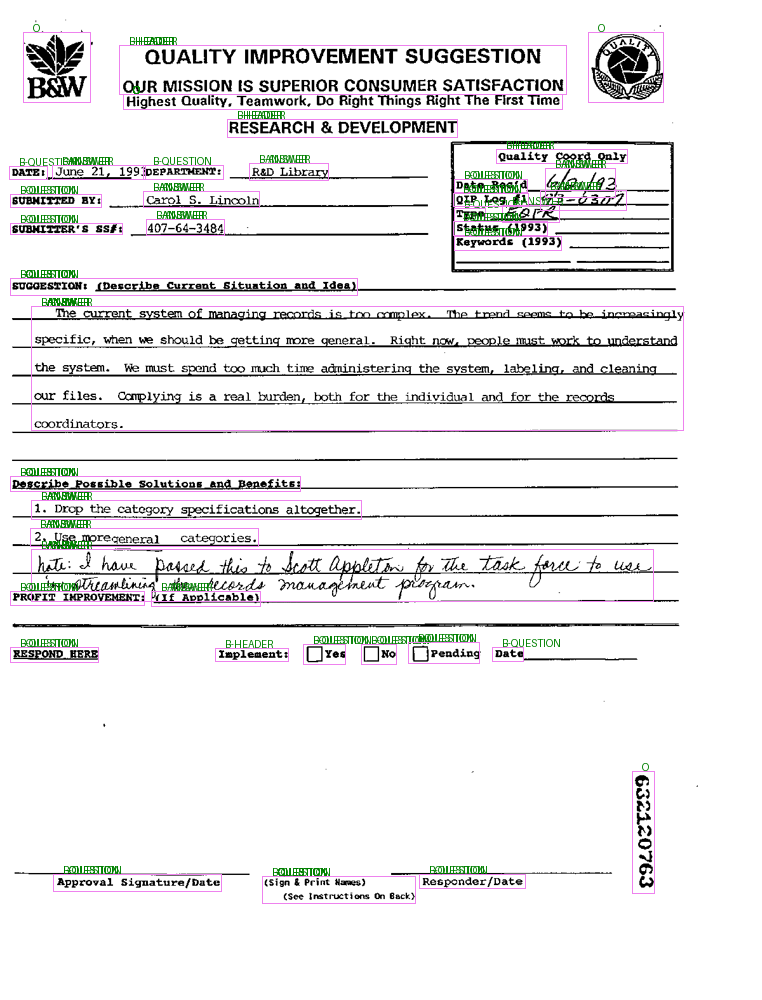

In [30]:
sample = dataset["train"][5]
print(sample)
annotated_img = plot_visualization(sample)
annotated_img   